In [1]:
from Data import ParticleDataGenerator, ParticleDataset
import numpy as np
from torch.utils.data import DataLoader, random_split
import numpy as np 
import matplotlib.pyplot as plt

params: 
n data:  1000
n scalar input:  8
n energy matrix:  7
n high resolution energy matrix:  500
category_mean_diff:  1
std_dev_ratio:  2
category_ratio:  0.5

number of data:
category 1:  500
category 2:  500

std:
category 1:  [1, 1]
category 2:  [2, 2]

scalar input shape:
category 1:  (500, 8)
category 2:  (500, 8)
category 1 & 2:  (1000, 8)

covariance of x, y: 
category 1:  [[1, 0.5], [0.5, 1]]
category 2:  [[2, 1.0], [1.0, 2]]

mean of x, y: 
category 1:  [-0.5, -0.5]
category 2:  [0.5, 0.5]

mean of x, y: 
category 1:  [-0.5, -0.5]
category 2:  [0.5, 0.5]



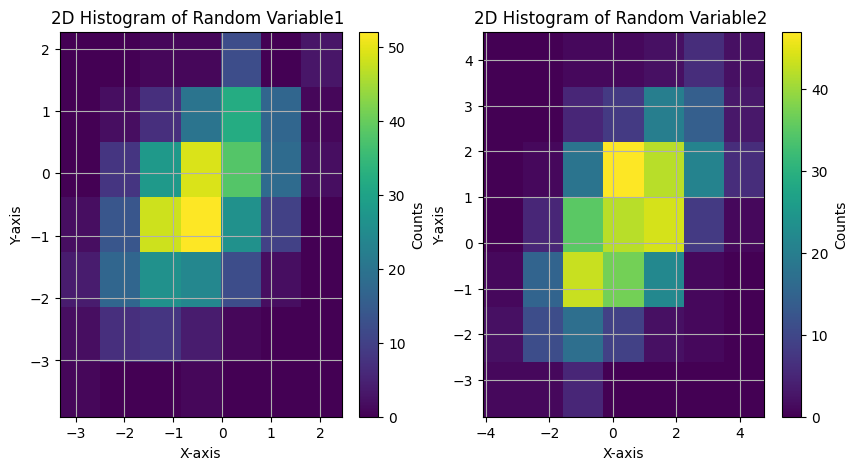

energy distribution shape:  (1000, 7, 7)


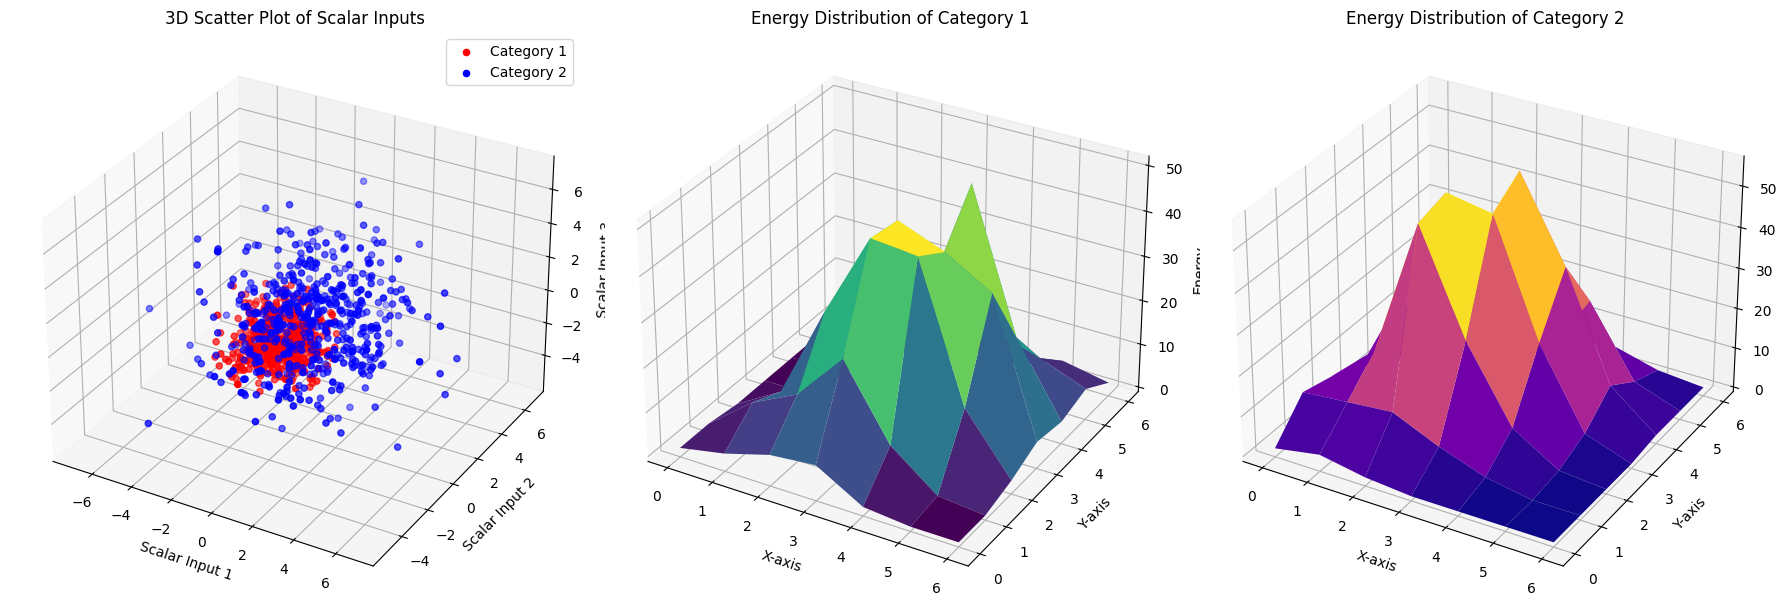

In [2]:
def test():
    # Use the ParticleDataGenerator to generate data
    n = 1000
    n_scalar = 8
    energy_matrix_size = 7
    high_res_size = 500 # energy high resolution size
    generator = ParticleDataGenerator(num_data_points=n, num_scalars=n_scalar, energy_matrix_size=energy_matrix_size, high_res_size=high_res_size)

    # Generate the data
    category_mean_diff = 1 # difference of mean
    std_dev_ratio = 2 # ratio of std category1 and std category2
    category_ratio = 0.5 # category ratio
    scalar_inputs, energy_distributions, labels = generator.generate_data(category_mean_diff, std_dev_ratio, category_ratio, debug=True)

    # Set up the figure for 3D plotting
    fig = plt.figure(figsize=(18, 6))

    # 3D plot for the scalar inputs
    ax1 = fig.add_subplot(131, projection='3d')

    # Plot scalar inputs for both categories
    category1_mask = labels.numpy().reshape(-1) == 0
    category2_mask = labels.numpy().reshape(-1) == 1

    ax1.scatter(scalar_inputs[category1_mask, 0], scalar_inputs[category1_mask, 1], scalar_inputs[category1_mask, 2], c='r', label='Category 1')
    ax1.scatter(scalar_inputs[category2_mask, 0], scalar_inputs[category2_mask, 1], scalar_inputs[category2_mask, 2], c='b', label='Category 2')

    # Set labels and title
    ax1.set_xlabel('Scalar Input 1')
    ax1.set_ylabel('Scalar Input 2')
    ax1.set_zlabel('Scalar Input 3')
    ax1.set_title('3D Scatter Plot of Scalar Inputs')
    ax1.legend()

    # 3D plot for the energy matrix of an example from category 1
    ax2 = fig.add_subplot(132, projection='3d')
    example_category_1 = energy_distributions[category1_mask][0]
    x, y = np.meshgrid(np.arange(7), np.arange(7))
    z = example_category_1.numpy()
    ax2.plot_surface(x, y, z, cmap='viridis')
    ax2.set_title('Energy Distribution of Category 1')
    ax2.set_xlabel('X-axis')
    ax2.set_ylabel('Y-axis')
    ax2.set_zlabel('Energy')

    # 3D plot for the energy matrix of an example from category 2
    ax3 = fig.add_subplot(133, projection='3d')
    example_category_2 = energy_distributions[category2_mask][0]
    z = example_category_2.numpy()
    ax3.plot_surface(x, y, z, cmap='plasma')
    ax3.set_title('Energy Distribution of Category 2')
    ax3.set_xlabel('X-axis')
    ax3.set_ylabel('Y-axis')
    ax3.set_zlabel('Energy')

    # Show the plot
    plt.tight_layout()
    plt.show()
test()
    

In [3]:
category_mean_diff = 1 # difference of mean
std_dev_ratio = 2 # ratio of std category1 and std category2
category_ratio = 0.5 # category ratio
high_res_size = 1000 # energy high resolution size
generator = ParticleDataGenerator(num_data_points=1000, num_scalars=3, energy_matrix_size=7, high_res_size=high_res_size, seed=42)
scalar_inputs, energy_distributions, labels = generator.generate_data(category_mean_diff, std_dev_ratio, category_ratio)

In [4]:
# Create the dataset
particle_dataset = ParticleDataset(scalar_inputs, energy_distributions, labels)

# Create a DataLoader instance
batch_size = 8
particle_dataloader = DataLoader(particle_dataset, batch_size=batch_size, shuffle=True)

# We can iterate over the DataLoader
# Here's how we can get the first batch of data
first_batch = next(iter(particle_dataloader))

# Output the shapes of the data in the first batch
print(first_batch[0].shape, first_batch[1].shape, first_batch[2].shape)

torch.Size([8, 3]) torch.Size([8, 7, 7]) torch.Size([8, 1])


In [5]:
first_batch[0]

tensor([[-0.9433, -1.3848, -0.6729],
        [-0.9839, -0.8203, -0.0758],
        [ 0.1106,  0.3716,  0.6835],
        [ 1.9431,  0.0383,  3.4065],
        [ 0.0138,  0.0150,  3.3527],
        [ 0.8282,  0.0562, -0.0441],
        [ 0.8996,  1.0280,  3.0447],
        [-0.5777, -1.5171, -3.4253]])

In [6]:
first_batch[1][0]

tensor([[  2.,   5.,   4.,   1.,   0.,   0.,   0.],
        [  2.,  21.,  39.,  33.,  15.,   1.,   0.],
        [  3.,  17., 116., 162., 101.,  22.,   3.],
        [  0.,   3.,  41., 133., 128.,  57.,   3.],
        [  0.,   0.,   1.,  14.,  40.,  19.,   6.],
        [  0.,   0.,   0.,   1.,   3.,   2.,   1.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   1.]])

In [7]:
first_batch[1][2]

tensor([[  0.,   1.,   3.,   2.,   1.,   0.,   0.],
        [  4.,  13.,  22.,  16.,   4.,   0.,   0.],
        [  4.,  24.,  71.,  68.,  30.,   1.,   0.],
        [  1.,  26.,  88., 135.,  83.,  13.,   1.],
        [  1.,   3.,  35.,  92.,  85.,  24.,   4.],
        [  0.,   1.,   9.,  32.,  47.,  23.,   7.],
        [  0.,   0.,   0.,   1.,   7.,  14.,   4.]])

In [8]:
first_batch[2]

tensor([[0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.]])